# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

def getPriceDataFromUrl(url, index, currency_type='CAD'):
    response = requests.get(url)
    data = response.json()
    return data['data'][index]['quotes'][currency_type]['price']

def calculate_crypto_value(current_amt, price):
    return (current_amt*price)

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

#### Collect Crypto Prices Using the `requests` Library

1. Create two variables called `my_btc` and `my_eth`. Set them equal to `1.2` and `5.3`, respectively.

2. Use the `requests` library to fetch the current price in Canadian dollars (`CAD`) of bitcoin (`BTC`) and ethereum (`ETH`) using the **Alternative Free Crypto API** endpoints provided in the starter notebook.

3. Parse the API JSON response to select only the crypto prices and store each price in a variable.

    **Hint:** Be aware of the particular identifier for each cryptocurrency in the API JSON response - the bitcoin identifier is `1` whereas ethereum is `1027`.

4. Compute the portfolio value of cryptocurrencies and print the results.


In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
my_btc_price = getPriceDataFromUrl(btc_url, index='1')

# Fetch current ETH price
my_eth_price = getPriceDataFromUrl(eth_url, index='1027')

# Compute current value of my crpto
my_btc_value = calculate_crypto_value(my_btc, my_btc_price)
my_eth_value = calculate_crypto_value(my_eth, my_eth_price)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $48731.84
The current value of your 5.3 ETH is $13027.01


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

1. Create two variables named `my_agg` and `my_spy` and set them equal to `200` and `50`, respectively.

2. Set the Alpaca API key and secret key variables, then create the Alpaca API object using the `tradeapi.REST` function from the Alpaca SDK.

3. Format the current date as ISO format. You may change the date set in the starter code to the current date.

4. Get the current closing prices for `SPY` and `AGG` using Alpaca's `get_barset()` function. Transform the function's response to a Pandas DataFrame and preview the data.

5. Pick the `SPY` and `AGG` close prices from the Alpaca's `get_barset()` DataFrame response and store them as Python variables. Print the closing values for validation. Make sure to add the parameter `limit=1000` to the function call in order to receive back as much data from Alpaca as possible.

6. Compute the value in dollars of the current amount of shares and print the results.


In [6]:
# Set current amount of shares

## Bonds
my_agg = 200

## Stocks
my_spy = 50 

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
my_date = datetime.now()
print(my_date.isoformat())

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()


# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    #start = today,
    #end = today
    limit=1000
).df

# Preview DataFrame
df_portfolio

2021-06-21T22:46:03.339776


AGG                                          \
                              open      high      low    close      volume   
time                                                                         
2017-06-28 00:00:00-04:00  109.850  109.8800  109.680  109.850  12016805.0   
2017-06-29 00:00:00-04:00  109.530  109.6800  109.465  109.640   2457876.0   
2017-06-30 00:00:00-04:00  109.620  109.6273  109.460  109.490   2201175.0   
2017-07-03 00:00:00-04:00  109.300  109.3000  109.010  109.080   1681516.0   
2017-07-05 00:00:00-04:00  109.080  109.1800  109.000  109.150   2694196.0   
...                            ...       ...      ...      ...         ...   
2021-06-14 00:00:00-04:00  115.180  115.1800  114.935  114.970   2999623.0   
2021-06-15 00:00:00-04:00  114.900  115.0200  114.870  114.995   5842592.0   
2021-06-16 00:00:00-04:00  115.070  115.1285  114.510  114.630   7527672.0   
2021-06-17 00:00:00-04:00  114.792  115.2500  114.785  114.990   7417691.0   
2021-06-18 00:00:00-04:00  115.050  115.3900  114.910  115.290   5438261.0   

                              SPY                                         
                             open      high      low   close      volume  
time                                                                      
2017-06-28 00:00:00-04:00     NaN       NaN      NaN     NaN         NaN  
2017-06-29 00:00:00-04:00  243.66  243.7200  239.955  241.39  87799860.0  
2017-06-30 00:00:00-04:00  242.26  242.7100  241.575  241.77  50347309.0  
2017-07-03 00:00:00-04:00  242.91  243.3800  242.290  242.32  27234078.0  
2017-07-05 00:00:00-04:00  242.62  243.0100  241.700  242.77  41067682.0  
...                           ...       ...      ...     ...         ...  
2021-06-14 00:00:00-04:00  424.43  425.2900  423.100  425.29  33128340.0  
2021-06-15 00:00:00-04:00  425.43  425.4600  423.540  424.50  42885806.0  
2021-06-16 00:00:00-04:00  424.63  424.8700  419.920  422.12  73638324.0  
2021-06-17 00:00:00-04:00  421.67  423.0200  419.320  421.97  71991686.0  
2021-06-18 00:00:00-04:00  417.08  417.8281  414.700  415.01  92753385.0  

[1001 rows x 10 columns]

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close']
spy_close_price = df_portfolio['SPY']['close']
print (df_portfolio['AGG'])

# Print AGG and SPY close prices
print (df_portfolio['AGG']['close'][(df_portfolio['AGG'].count()-1)][0])
print (df_portfolio['SPY']['close'][(df_portfolio['SPY'].count()-1)][0])

                              open      high      low    close      volume
time                                                                      
2017-06-28 00:00:00-04:00  109.850  109.8800  109.680  109.850  12016805.0
2017-06-29 00:00:00-04:00  109.530  109.6800  109.465  109.640   2457876.0
2017-06-30 00:00:00-04:00  109.620  109.6273  109.460  109.490   2201175.0
2017-07-03 00:00:00-04:00  109.300  109.3000  109.010  109.080   1681516.0
2017-07-05 00:00:00-04:00  109.080  109.1800  109.000  109.150   2694196.0
...                            ...       ...      ...      ...         ...
2021-06-14 00:00:00-04:00  115.180  115.1800  114.935  114.970   2999623.0
2021-06-15 00:00:00-04:00  114.900  115.0200  114.870  114.995   5842592.0
2021-06-16 00:00:00-04:00  115.070  115.1285  114.510  114.630   7527672.0
2021-06-17 00:00:00-04:00  114.792  115.2500  114.785  114.990   7417691.0
2021-06-18 00:00:00-04:00  115.050  115.3900  114.910  115.290   5438261.0

[1001 rows x 5 columns]


In [10]:
# Compute the current value of shares
my_spy_value = df_portfolio['SPY']['close'][df_portfolio['SPY'].count()-1][0] * my_spy
my_agg_value = df_portfolio['AGG']['close'][df_portfolio['AGG'].count()-1][0] * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21098.50
The current value of your 200 AGG shares is $22998.00


### Savings Health Analysis

In this section, you will assess the financial health of the credit union's members.

1. Create a variable called `monthly_income` and set its value to `12000`.

2. To analyze savings health, create a DataFrame called `df_savings` with two rows. Store the total value in dollars of the crypto assets in the first row and the total value of the shares in the second row.

    **Hint:** The `df_savings` DataFrame should have one column named `amount` and two rows where `crypto` and `shares` are the index values: 
    
    ![df_savings](Images/df_savings.png)

3. Use the `df_savings` DataFrame to plot a pie chart to visualize the composition of personal savings.

4. Use `if` conditional statements to validate if the current savings are enough for an emergency fund. An ideal emergency fund should be equal to three times your monthly income.

    * If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.

    * If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.

    * If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.


In [11]:
# Set monthly household income
monthly_income = 12000
# Consolidate financial assets data
crypto_value_total = my_btc_value + my_eth_value
stocks_value_total = my_spy_value + my_agg_value   


# Create savings DataFrame
data = {'crypto': [crypto_value_total], 'stocks': [stocks_value_total]}
df_savings = pd.DataFrame.from_dict(data, orient='index',columns=['Value'])
# Display savings DataFrame
display(df_savings)

,Value
crypto,61758.851403
stocks,44096.500000


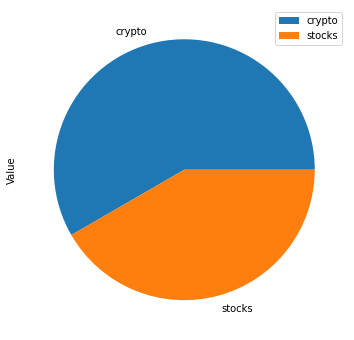

In [12]:
# Plot savings pie chart
plot = df_savings.plot.pie(subplots=True, figsize=(11, 6))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value_total + stocks_value_total

# Validate saving health
if (total_savings>emergency_fund):
    print ("Congratulations! for having enough money in this fund")
elif (total_savings==emergency_fund):
    print ("Congratulations! for reaching this financial goal")
else:
    print ("You are "+str(emergency_fund-total_savings)+" dollars away from reaching the goal")

Congratulations! for having enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In this section, you will use the Alpaca API to fetch historical closing prices for a retirement portfolio and then Use the MCForecastTools toolkit to create Monte Carlo simulations to project the portfolio performance at `30` years. You will then use the Monte Carlo data to answer questions about the portfolio.

Follow the steps outlined in the starter notebook to complete the following:

#### Monte Carlo Simulation

1. Use the Alpaca API to fetch five years historical closing prices for a traditional `40/60` portfolio using the `SPY` and `AGG` tickers to represent the `60%` stocks (`SPY`) and `40%` bonds (`AGG`) composition of the portfolio. Make sure to convert the API output to a DataFrame and preview the output.

    > *Note*: As before, use the parameter `limit=1000` to ensure you get the most data possible back from the API. In Monte-Carlo Simulation, getting data as far back as possible matters, because if we simulate using only small amounts of data during a recent time when markets are booming, or instead falling precipitously, a Monte-Carlo Analysis will inadvertently extrapolate this temporary market movement too far into the future. Getting data over a longer time period mitigates this effect.

2. Configure and execute a Monte Carlo Simulation of `500` runs and `30` years for the `40/60` portfolio.

3. Plot the simulation results and the probability distribution/confidence intervals.

    ![monte carlo](Images/monte-carlo.png)
        
    ![histogram](Images/histogram.png)


In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010768,1.002805,0.996409,1.002426,1.017286,0.997298,0.994698,1.000335,1.004222,0.997970,...,1.013485,1.001979,1.006093,0.998050,0.997795,1.002350,1.001480,1.001919,0.997171,1.004635
2,1.016874,0.999586,0.994769,1.004196,1.028955,1.001915,0.995479,0.991188,1.009557,1.006965,...,1.013627,1.004239,1.007383,1.002195,0.998841,1.007731,1.007002,1.002408,0.997608,1.006685
3,1.012996,1.006402,0.995748,1.012806,1.029691,1.013126,0.991454,0.994456,1.007991,1.005638,...,1.009825,1.004671,1.004446,1.003454,1.007224,1.016279,1.012289,1.004056,0.991222,1.000087
4,1.016163,0.999178,0.985129,1.010843,1.038669,1.011930,0.995097,0.997979,1.007015,1.005825,...,1.015466,1.004067,1.005029,0.992822,1.010113,1.024597,1.012577,0.997767,0.995725,1.002382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.043940,6.052922,7.836809,11.453134,3.667306,6.868986,7.648470,7.783948,12.095991,3.095668,...,8.261191,9.566496,6.536900,18.984201,7.601126,4.980923,9.843423,16.845732,3.267944,7.854569
7557,7.044862,6.073687,7.901718,11.564144,3.663769,6.861237,7.625960,7.804750,12.067170,3.081927,...,8.251493,9.547507,6.510035,19.008588,7.629938,4.975619,9.887287,16.869548,3.268634,7.873285
7558,7.131624,6.021291,7.920305,11.563126,3.661479,6.859738,7.679927,7.842010,12.223051,3.102275,...,8.227941,9.535686,6.454005,18.956624,7.656450,5.010732,9.864146,16.887305,3.252808,7.860315
7559,7.126036,5.998153,7.871302,11.566576,3.664895,6.893858,7.697131,7.807279,12.118960,3.110273,...,8.210976,9.588601,6.427376,18.977197,7.741721,5.023124,9.938924,16.899551,3.256874,7.828953


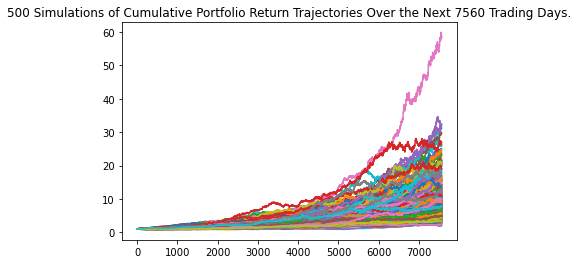

In [19]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

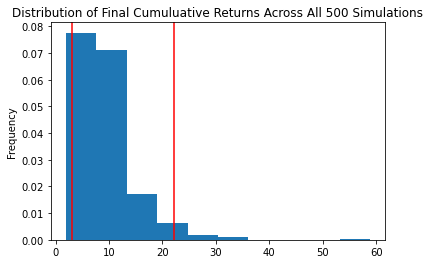

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('Output-Screenshots/MC_thirtyyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

1. Fetch the summary statistics from the Monte Carlo simulation results.

1. Given an initial investment of `$20,000`, calculate the expected portfolio return in dollars at the `95%` lower and upper confidence intervals.

2. Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              9.292769
std               5.412065
min               1.914607
25%               5.700071
50%               8.174758
75%              11.290073
max              58.842506
95% CI Lower      3.100718
95% CI Upper     22.155967
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $62014.37 and $443119.35


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 30000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $93021.55 and $664679.02


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyear

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [ ]:
# Plot simulation outcomes
MC_fiveyear.calc_cumulative_return()

In [ ]:
# Plot probability distribution and confidence intervals
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("Output-Screenshots/MC_fiveyear_sim_plot.png", bbox_inches="tight")

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

In [ ]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

In [ ]:
# Plot simulation outcomes
MC_tenyear.calc_cumulative_return()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_tenyyear_dist_plot.png',bbox_inches='tight')

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

In [ ]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")